In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras
from tensorflow.keras import layers

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-07-09 12:02:39.288778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 12:02:39.288905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 12:02:39.389725: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
!rm -rf /kaggle/working/*

Count Number of imgaes in cat and dogs folder

In [2]:
import os

dog_cnt, cat_cnt = 0,0
# countin dogs images
for items in os.listdir('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog'):
    dog_cnt+=1
for items in os.listdir('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat'):
    cat_cnt+=1
print(f'there are total {dog_cnt} dog images and {cat_cnt} cat images')

there are total 12501 dog images and 12501 cat images


**Create Train, Validation and Test directory**
total 2500 images of dogs and cat. we will divide them as below:
* train data = 1000 each images
* test data = 1000 each images
* validation data = 500 each images

In [3]:
# record all dogs and cats images
dog_imgs = os.listdir('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog')
cat_imgs = os.listdir('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat')

In [4]:
import shutil
def creat_folder(start_index,end_index,dir_name):
    # create the folder
    os.mkdir(os.path.join('/kaggle/working/',dir_name)) if not os.path.exists(os.path.join('/kaggle/working/',dir_name)) else print('already exists')
    os.mkdir(os.path.join('/kaggle/working/',dir_name,'Cat')) if not os.path.exists(os.path.join('/kaggle/working/',dir_name,'Cat')) else print('already exists')
    os.mkdir(os.path.join('/kaggle/working/',dir_name,'Dog')) if not os.path.exists(os.path.join('/kaggle/working/',dir_name,'Dog')) else print('already exists')
    
    # samples images according to start and end indexes
    sample_dog = dog_imgs[start_index:end_index]
    sample_cat = cat_imgs[start_index:end_index]
    
    # sampling dog imgaes and pasting it to destination folder
    for img in sample_dog:
        if img ==  '666.jpg' or img ==  '11702.jpg':
            continue
        src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog',img)
        dst = os.path.join('/kaggle/working/',dir_name,'Dog')
        shutil.copy(src, dst)
    # sampling cat imgaes and pasting it to destination folder
    for img in sample_cat:
        if img ==  '666.jpg' or img ==  '11702.jpg':
            continue
        src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat',img)
        dst = os.path.join('/kaggle/working/',dir_name,'Cat')
        shutil.copy(src, dst)

In [5]:
# train data
dir_name = 'train'
creat_folder(0,1000,dir_name)
# test data
dir_name = 'test'
creat_folder(1000,2000,dir_name)
# validation data
dir_name = 'val'
creat_folder(2000,2500,dir_name)

In [6]:
# displying one of the cat image
from PIL import Image
import matplotlib.pyplot as plt

sample_cat = Image.open(os.path.join('/kaggle/working/train/Cat/6107.jpg'))
sample_dog = Image.open(os.path.join('/kaggle/working/train/Dog/6107.jpg'))

(235, 249)


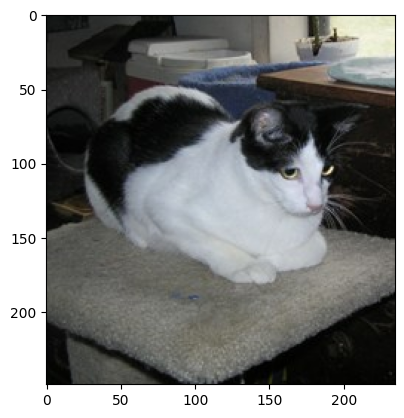

In [7]:
plt.imshow(sample_cat)
print(sample_cat.size)

(375, 500)


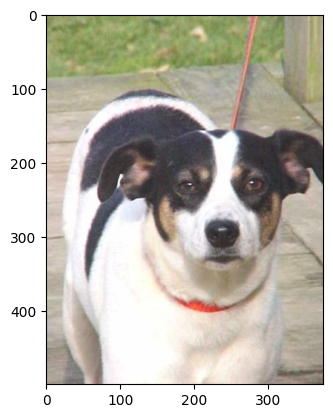

In [8]:
plt.imshow(sample_dog)
print(sample_dog.size)

In [9]:

inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32,kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid") (x)
model = keras.Model(inputs=inputs, outputs=outputs) 

In [10]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator().flow_from_directory(
    directory='/kaggle/working/train',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)
val_data = ImageDataGenerator().flow_from_directory(
    directory='/kaggle/working/val',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)
test_data = ImageDataGenerator().flow_from_directory(
    directory='/kaggle/working/test',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/model.keras',
    save_best_only=True,
    monitor="val_loss")
]

In [14]:
history = model.fit(train_data,epochs=20,validation_data=val_data,callbacks=callbacks)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 4/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5072 - loss: 0.7331

I0000 00:00:1720526705.438969     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.5266 - loss: 0.7079 - val_accuracy: 0.5060 - val_loss: 0.6918
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5351 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6958
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5520 - loss: 0.6911 - val_accuracy: 0.5820 - val_loss: 0.6607
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.6565 - loss: 0.6319 - val_accuracy: 0.6670 - val_loss: 0.5979
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.7165 - loss: 0.5651 - val_accuracy: 0.6290 - val_loss: 0.7458
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.7107 - loss: 0.5575 - val_accuracy: 0.6750 - val_loss: 0.5830
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.7663 - loss: 0.5067 - val_accuracy: 0.7050 - val_loss: 0.5490
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.7732 - loss: 0.4841 - val_accuracy: 0.7310 - val_loss: 

In [15]:
model.evaluate(test_data)

62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7287 - loss: 1.5593

/opt/conda/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7282 - loss: 1.5589


[1.5481103658676147, 0.7114999890327454]

In [16]:
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(1,len(train_acc)+1)

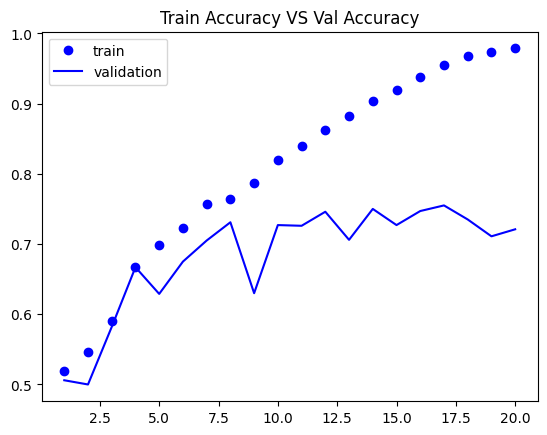

In [17]:
plt.plot(epochs,train_acc,"bo",label='train')
plt.plot(epochs,val_acc,'b',label='validation')
plt.title('Train Accuracy VS Val Accuracy')
plt.legend()
plt.show()

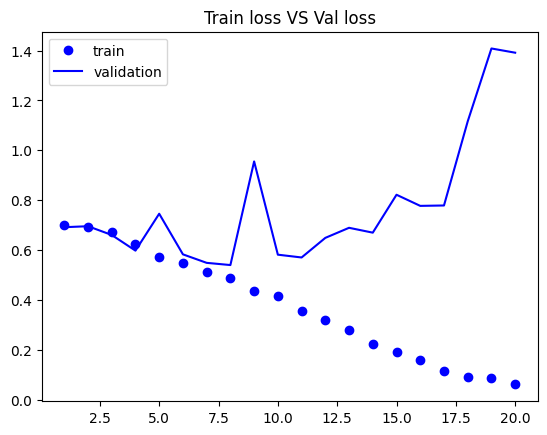

In [18]:
plt.plot(epochs,train_loss,"bo",label='train')
plt.plot(epochs,val_loss,'b',label='validation')
plt.title('Train loss VS Val loss')
plt.legend()
plt.show()

## model training with modifications
1. adding data augmentation
2. adding drop out layer

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32,kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid") (x)
model = keras.Model(inputs=inputs, outputs=outputs) 

In [20]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.2
)

train_data = train_datagen.flow_from_directory(
    directory='/kaggle/working/train',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)
val_data = ImageDataGenerator().flow_from_directory(
    directory='/kaggle/working/val',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)
test_data = ImageDataGenerator().flow_from_directory(
    directory='/kaggle/working/test',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/model_with_aug.keras',
    save_best_only=True,
    monitor="val_loss")
]

In [25]:
history = model.fit(train_data,epochs=20,validation_data=val_data,callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - accuracy: 0.5296 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - accuracy: 0.5286 - loss: 0.6911 - val_accuracy: 0.6200 - val_loss: 0.6660
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 236ms/step - accuracy: 0.5993 - loss: 0.6799 - val_accuracy: 0.6200 - val_loss: 0.6524
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 242ms/step - accuracy: 0.6217 - loss: 0.6452 - val_accuracy: 0.6400 - val_loss: 0.6157
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - accuracy: 0.6756 - loss: 0.6217 - val_accuracy: 0.6260 - val_loss: 0.6476
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - accuracy: 0.6906 - loss: 0.5955 - val_accuracy: 0.7240 - val_loss: 0.5726
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - accuracy: 0.7081 - loss: 0.5720 - val_accuracy: 0.7430 - val_loss: 0.5315
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - accuracy: 0.7186 - loss: 0.5819 - val_accu

In [26]:
model.evaluate(test_data)

20/63 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7705 - loss: 0.4580

/opt/conda/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7840 - loss: 0.4562


[0.45259028673171997, 0.7940000295639038]

In [27]:
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(1,len(train_acc)+1)

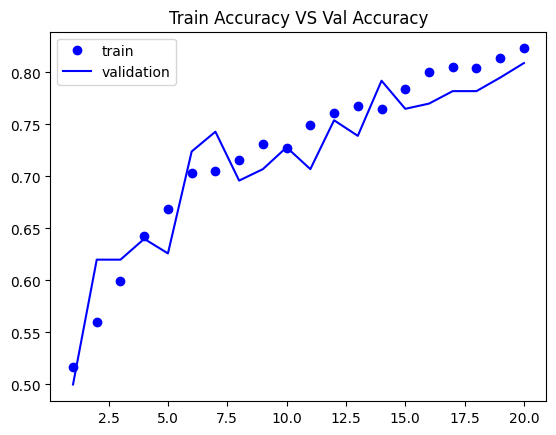

In [28]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,"bo",label='train')
plt.plot(epochs,val_acc,'b',label='validation')
plt.title('Train Accuracy VS Val Accuracy')
plt.legend()
plt.show()

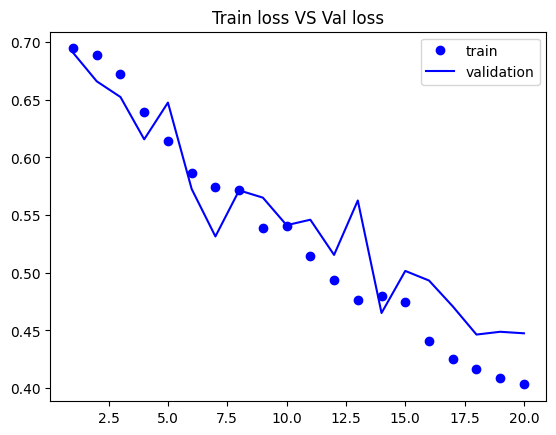

In [29]:
plt.plot(epochs,train_loss,"bo",label='train')
plt.plot(epochs,val_loss,'b',label='validation')
plt.title('Train loss VS Val loss')
plt.legend()
plt.show()

## Pretrained model (ImageNet)

### 1. Feature extraction

In [66]:
# initializing VGG16
conv_base = keras.applications.vgg16.VGG16(
    weights= 'imagenet',
    include_top = False,
    input_shape=(180,180,3)
)

In [67]:
conv_base.trainable=False

In [68]:
inputs = keras.Input(shape=(180,180,3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten() (x)
x = layers.Dense(256) (x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
vgg16model = keras.Model(inputs,outputs)

In [69]:
vgg16model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_9          │ (None, 180, 180)  │          0 │ input_layer_8[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_10         │ (None, 180, 180)  │          0 │ input_layer_8[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_11         │ (None, 180, 180)  │          0 │ input_layer_8[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_3 (Stack)     │ (None, 180, 180,  │          0 │ get_item_9[0][0], │
│                     │ 3)                │            │ get_item_10[0][0… │
│                     │                   │            │ get_item_11[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 180, 180,  │          0 │ stack_3[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 5, 5, 512) │ 14,714,688 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 12800)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │  3,277,056 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256)       │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │        257 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [53]:
vgg16model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.2
)

train_data = train_datagen.flow_from_directory(
    directory='/kaggle/working/train',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)
val_data = ImageDataGenerator().flow_from_directory(
    directory='/kaggle/working/val',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)
test_data = ImageDataGenerator().flow_from_directory(
    directory='/kaggle/working/test',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [55]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/model_with_vgg16.keras',
    save_best_only=True,
    monitor="val_loss")
]

In [ ]:
history = vgg16model.fit(train_data,epochs=20,validation_data=val_data,
                    callbacks=callbacks)

Epoch 1/20
 1/63 ━━━━━━━━━━━━━━━━━━━━ 4:53 5s/step - accuracy: 0.4688 - loss: 16.7262

W0000 00:00:1720527929.839051     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


49/63 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - accuracy: 0.8458 - loss: 35.6382

W0000 00:00:1720527942.880141     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.8611 - loss: 31.2068

W0000 00:00:1720527945.919480     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720527948.999281     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 314ms/step - accuracy: 0.8620 - loss: 30.9454 - val_accuracy: 0.9490 - val_loss: 7.4909
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - accuracy: 0.9619 - loss: 4.4961 - val_accuracy: 0.9640 - val_loss: 4.9081
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - accuracy: 0.9702 - loss: 3.6789 - val_accuracy: 0.9720 - val_loss: 3.3303
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - accuracy: 0.9716 - loss: 2.9824 - val_accuracy: 0.9700 - val_loss: 5.3048
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 0.9752 - loss: 3.9312 - val_accuracy: 0.9650 - val_loss: 6.3667
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.9805 - loss: 2.8850 - val_accuracy: 0.9760 - val_loss: 3.9950
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 0.9794 - loss: 3.4750 - val_accuracy: 0.9720 - val_loss: 5.4849
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 263ms/step - accuracy: 0.9738 - loss: 3.4149 - val_accuracy: 0.97

In [57]:
vgg16model.evaluate(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9598 - loss: 14.0898


W0000 00:00:1720528331.339262     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[11.649686813354492, 0.9620000123977661]

In [58]:
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(1,len(train_acc)+1)

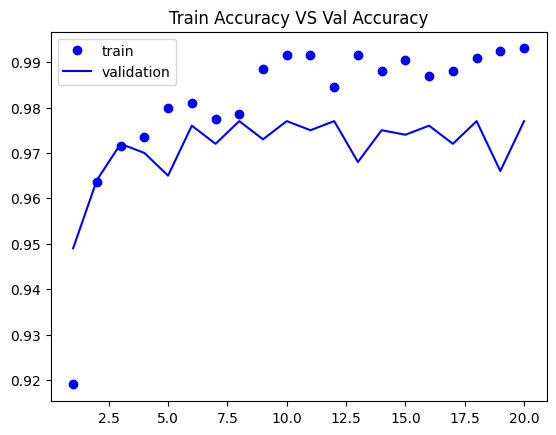

In [59]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,"bo",label='train')
plt.plot(epochs,val_acc,'b',label='validation')
plt.title('Train Accuracy VS Val Accuracy')
plt.legend()
plt.show()

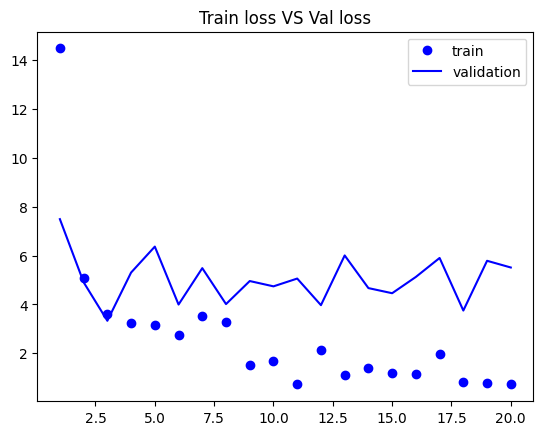

In [60]:
plt.plot(epochs,train_loss,"bo",label='train')
plt.plot(epochs,val_loss,'b',label='validation')
plt.title('Train loss VS Val loss')
plt.legend()
plt.show()

### 2. Fine tuning  

In [70]:
conv_base.trainable=True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [71]:
vgg16model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

In [72]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/model_with_vgg16.keras',
    save_best_only=True,
    monitor="val_loss")
]

In [73]:
history = vgg16model.fit(train_data,epochs=15,validation_data=val_data,
                    callbacks=callbacks)

Epoch 1/15
 1/63 ━━━━━━━━━━━━━━━━━━━━ 5:32 5s/step - accuracy: 0.5938 - loss: 10.9730

W0000 00:00:1720528452.317437     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 6/63 ━━━━━━━━━━━━━━━━━━━━ 31s 558ms/step - accuracy: 0.5736 - loss: 11.2653

W0000 00:00:1720528455.032341     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7215 - loss: 5.7741

W0000 00:00:1720528468.599341     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720528471.709915     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.7225 - loss: 5.7414 - val_accuracy: 0.9230 - val_loss: 0.9829
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.8883 - loss: 1.3613 - val_accuracy: 0.9440 - val_loss: 0.4878
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.9290 - loss: 0.5566 - val_accuracy: 0.9570 - val_loss: 0.3582
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - accuracy: 0.9393 - loss: 0.4505 - val_accuracy: 0.9600 - val_loss: 0.2708
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 275ms/step - accuracy: 0.9517 - loss: 0.3520 - val_accuracy: 0.9620 - val_loss: 0.2495
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.9663 - loss: 0.2062 - val_accuracy: 0.9640 - val_loss: 0.2154
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - accuracy: 0.9594 - loss: 0.1835 - val_accuracy: 0.9710 - val_loss: 0.1739
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - accuracy: 0.9699 - loss: 0.1252 - val_accuracy: 0.971

In [82]:
vgg16model.evaluate(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9644 - loss: 0.4113


W0000 00:00:1720528968.354206     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.4317622780799866, 0.9664999842643738]

In [83]:
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(1,len(train_acc)+1)

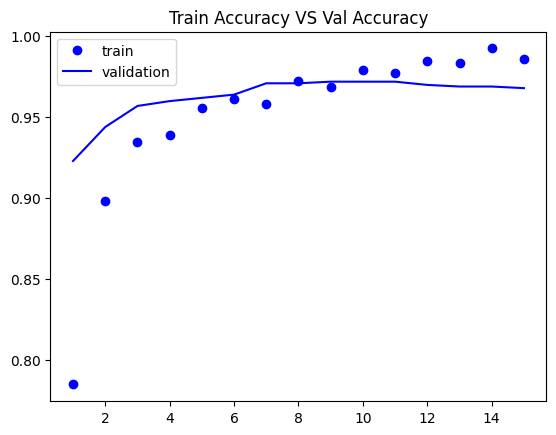

In [84]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,"bo",label='train')
plt.plot(epochs,val_acc,'b',label='validation')
plt.title('Train Accuracy VS Val Accuracy')
plt.legend()
plt.show()

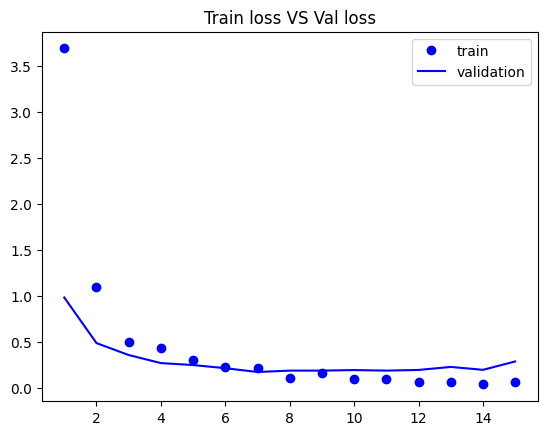

In [85]:
plt.plot(epochs,train_loss,"bo",label='train')
plt.plot(epochs,val_loss,'b',label='validation')
plt.title('Train loss VS Val loss')
plt.legend()
plt.show()